<a href="https://colab.research.google.com/github/sre-glitch/Prime_shows/blob/main/prime_shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**: Amazon Prime TV Shows and Movies  


**Project Type**- EDA


**Contribution**- Individual


**Name**- Sreya Tulasi K



## **Project Summary** -

## Overview
This project analyzes the extensive library of shows and movies available on Amazon Prime Video (U.S. region) to uncover key insights about content diversity, trends over time, regional production, and audience reception. With a growing number of titles, data-driven analysis can help stakeholders understand platform dynamics and inform content and marketing strategies.

## Dataset Description
The dataset includes two CSV files:
- **titles.csv**: Contains 9,000+ unique titles with 15 attributes such as title name, type (TV show or movie), release year, genres, runtime, age certification, production countries, seasons, IMDb and TMDB scores and votes.
- **credits.csv**: Contains over 124,000 entries of actors and directors with information including person ID, title ID, name, character name, and role.

These files allow exploration of both content metadata and cast/director contributions.

## Key Objectives
- **Content Diversity:** Identify dominant genres and categories on the platform.
- **Regional Availability:** Understand geographic distribution of content production.
- **Trends Over Time:** Analyze how Amazon Prime’s content library has evolved.
- **Ratings & Popularity:** Determine the highest-rated and most popular titles using IMDb and TMDB data.

## Tools and Libraries
- **Pandas:** For data cleaning, manipulation, and aggregation.
- **Matplotlib & Seaborn:** For insightful visualizations and pattern discovery.
- **NumPy:** For efficient numerical computations.

At least five different visualizations will be created to support these analyses.

## Expected Outcomes
The analysis aims to reveal:
- Which genres dominate Amazon Prime Video.
- Geographic trends in content production.
- Temporal trends highlighting growth and shifts in content.
- Top-rated and most popular titles based on user ratings.

These insights can guide Amazon Prime’s content strategy, improve user engagement, and help content creators and data analysts understand streaming platform trends.

---

# **Problem Statement**:

This dataset was created to analyze all shows available on Amazon Prime Video, enabling us to extract valuable insights such as:

Content Diversity: What genres and categories dominate the platform?

Regional Availability: How does content distribution vary across different regions?

Trends Over Time: How has Amazon Prime’s content library evolved?

IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?

By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies within the streaming industry.

In [ ]:
!pip install pandas numpy matplotlib seaborn wordcloud

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import zipfile

In [ ]:
# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# 2. Upload, Unzip and Load Datasets (Google Colab)
from google.colab import files
uploaded = files.upload()  # Upload 'titles.csv.zip' and 'credits.csv.zip'

# Unzip both files
with zipfile.ZipFile('titles.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()
with zipfile.ZipFile('credits.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Read the CSV files
titles_df = pd.read_csv('titles.csv')
credits_df = pd.read_csv('credits.csv')

Saving titles.csv.zip to titles.csv (1).zip
Saving credits.csv.zip to credits.csv (1).zip


In [ ]:
# 3. Preview the data
print("Titles Dataset:")
display(titles_df.head())

print("\nCredits Dataset:")
display(credits_df.head())


Titles Dataset:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6



Credits Dataset:


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [ ]:
# 4. Check for nulls and data types
print("\nTitles Data Info:")
print(titles_df.info())

print("\nCredits Data Info:")
print(credits_df.info())


Titles Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes:

In [ ]:
# 5. Data Cleaning
# Convert 'release_year' to numeric
titles_df['release_year'] = pd.to_numeric(titles_df['release_year'], errors='coerce')

# Drop rows where title is missing
titles_df.dropna(subset=['title'], inplace=True)

# Fill missing values in string fields
titles_df['genres'] = titles_df['genres'].fillna('Unknown')
titles_df['type'] = titles_df['type'].fillna('Unknown')

In [ ]:
# 6. Normalize genres (split multiple genres into lists)
titles_df['genres'] = titles_df['genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

/tmp/ipython-input-10-1600633694.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')


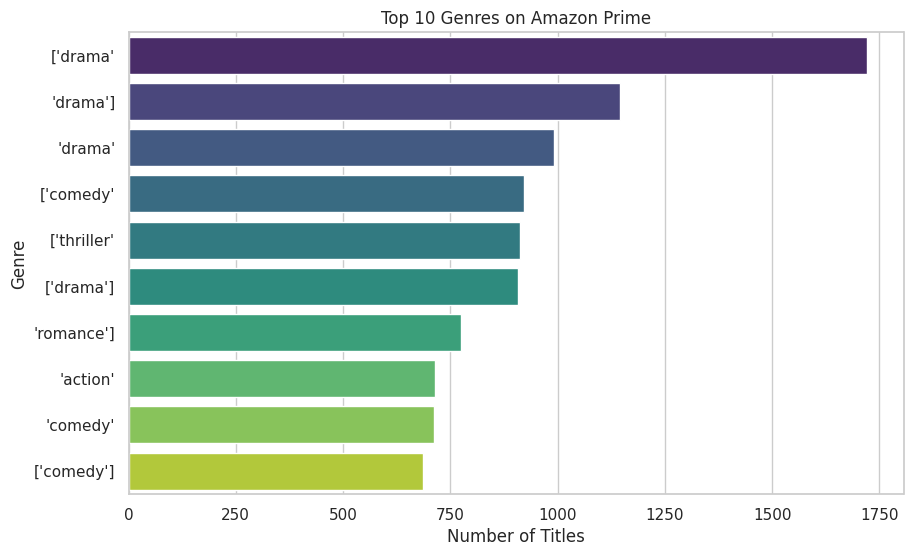

In [ ]:
# 7. Top 10 genres
from collections import Counter

all_genres = [genre for sublist in titles_df['genres'] for genre in sublist]
genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')
plt.title("Top 10 Genres on Amazon Prime")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

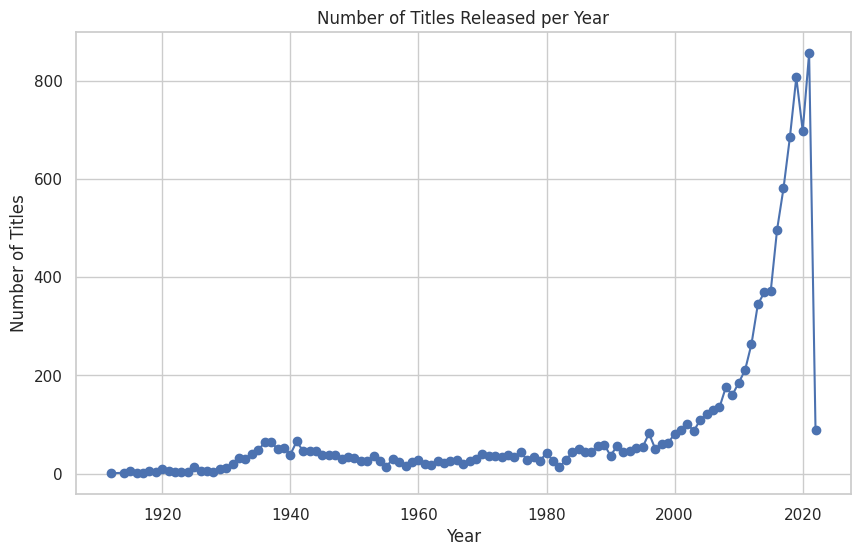

In [ ]:
# 8. Content by Year
yearly_count = titles_df['release_year'].value_counts().sort_index()

plt.plot(yearly_count.index, yearly_count.values, marker='o')
plt.title("Number of Titles Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

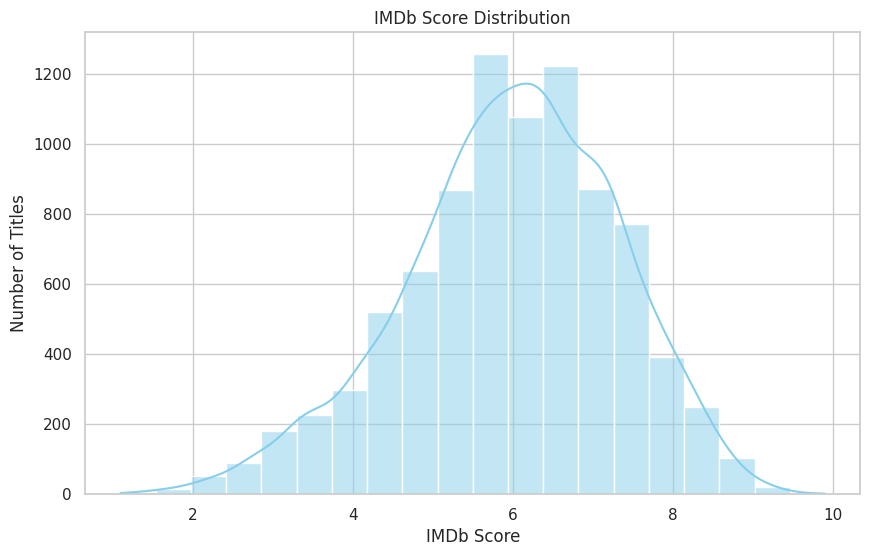

In [ ]:
# 9. IMDb Rating Distribution
titles_df['imdb_score'] = pd.to_numeric(titles_df['imdb_score'], errors='coerce')
sns.histplot(titles_df['imdb_score'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("IMDb Score Distribution")
plt.xlabel("IMDb Score")
plt.ylabel("Number of Titles")
plt.show()

In [ ]:
# 10. Most Popular Titles by IMDb Score
top_rated = titles_df[['title', 'imdb_score']].dropna().sort_values(by='imdb_score', ascending=False).head(10)
print("Top 10 Highest Rated Titles:")
display(top_rated)

Top 10 Highest Rated Titles:


,title,imdb_score
9135,Pawankhind,9.9
7783,Water Helps the Blood Run,9.7
9108,Couple of Mirrors,9.5
7422,The Chosen,9.4
9423,Tari Sathe,9.4
9052,Jai Bhim,9.3
9573,Pazhagiya Naatkal,9.3
5113,Subaru Launch Control,9.3
9741,Strictly for the Streets: Vol 1.,9.2
1159,Free to Choose,9.2


from matplotlib import pyplot as plt
top_rated['imdb_score'].plot(kind='hist', bins=20, title='imdb_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_rated['imdb_score'].plot(kind='line', figsize=(8, 4), title='imdb_score')
plt.gca().spines[['top', 'right']].set_visible(False)

/tmp/ipython-input-14-1155432067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


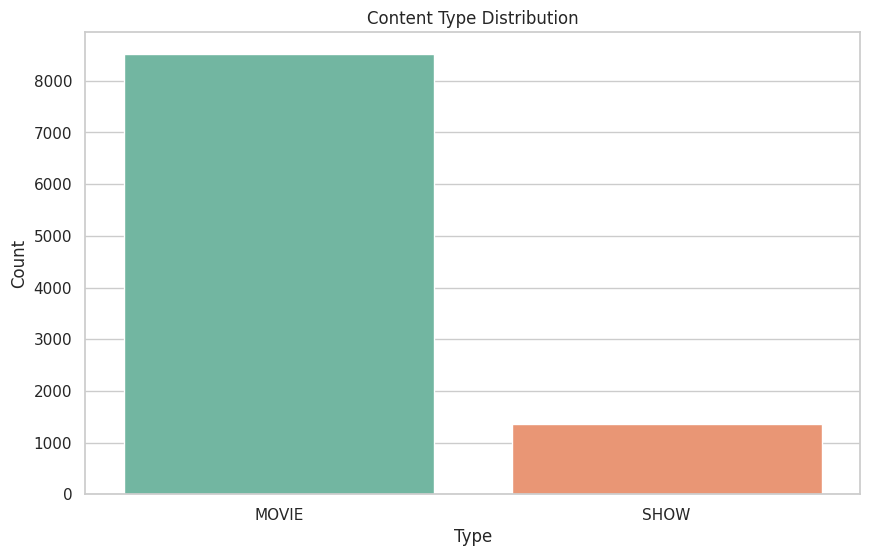

In [ ]:
# 11. Type of Shows (Movie or Show)
type_counts = titles_df['type'].value_counts()

sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title("Content Type Distribution")
plt.ylabel("Count")
plt.xlabel("Type")
plt.show()

/tmp/ipython-input-23-3421368812.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='imdb_score', data=avg_rating_by_type, palette='muted')


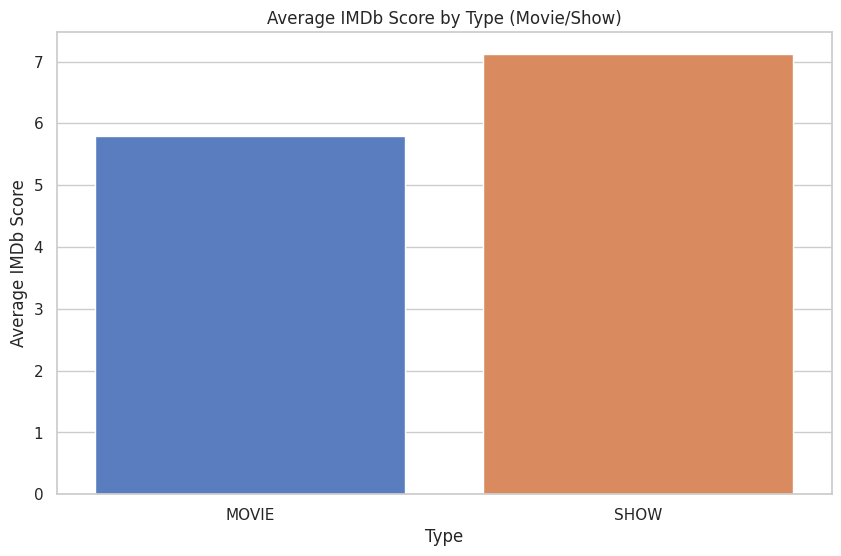

In [ ]:
# 12. Average IMDb Score by Content Type
avg_rating_by_type = titles_df.groupby('type')['imdb_score'].mean().reset_index()

sns.barplot(x='type', y='imdb_score', data=avg_rating_by_type, palette='muted')
plt.title("Average IMDb Score by Type (Movie/Show)")
plt.xlabel("Type")
plt.ylabel("Average IMDb Score")
plt.show()


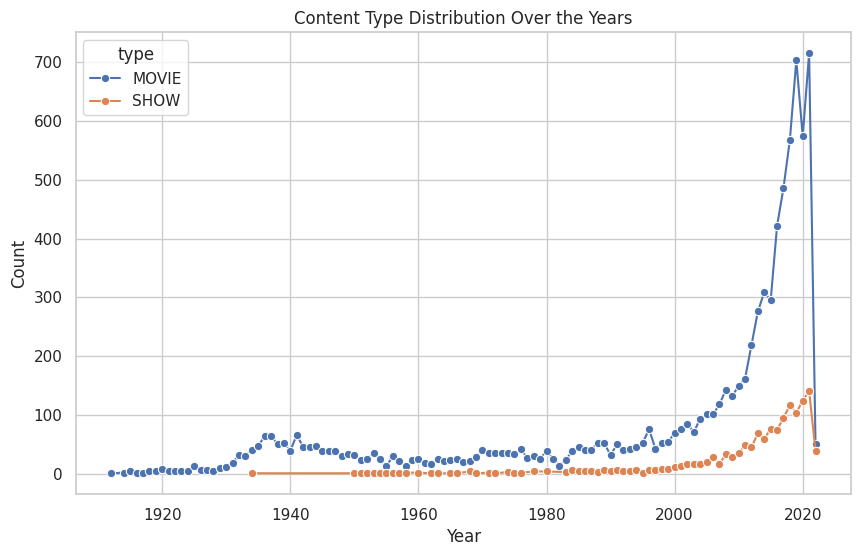

In [ ]:
# 13. Count of Shows/Movies Over Time (Grouped by Type)
type_year = titles_df.groupby(['release_year', 'type']).size().reset_index(name='count')

sns.lineplot(data=type_year, x='release_year', y='count', hue='type', marker='o')
plt.title("Content Type Distribution Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


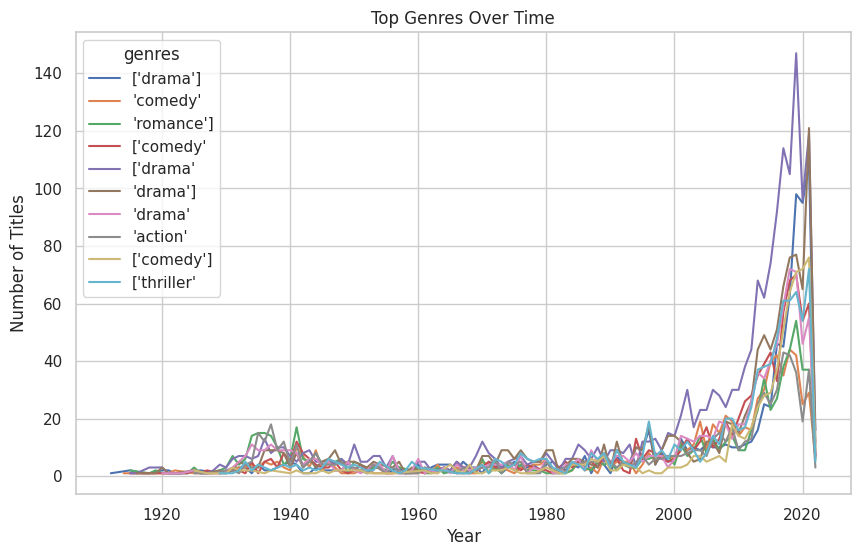

In [ ]:
# 14. Top 10 Most Used Genres Over Time
# Explode genres to individual rows
genres_exploded = titles_df.explode('genres')
genre_year = genres_exploded.groupby(['release_year', 'genres']).size().reset_index(name='count')

# Get top genres overall
top_genres_list = genre_counts.most_common(10)
top_genres_names = [g[0] for g in top_genres_list]

# Filter to top genres only
top_genre_years = genre_year[genre_year['genres'].isin(top_genres_names)]

# Plot
sns.lineplot(data=top_genre_years, x='release_year', y='count', hue='genres')
plt.title("Top Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


/tmp/ipython-input-26-3199846908.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titles_df, x='type', y='runtime', palette='cool')


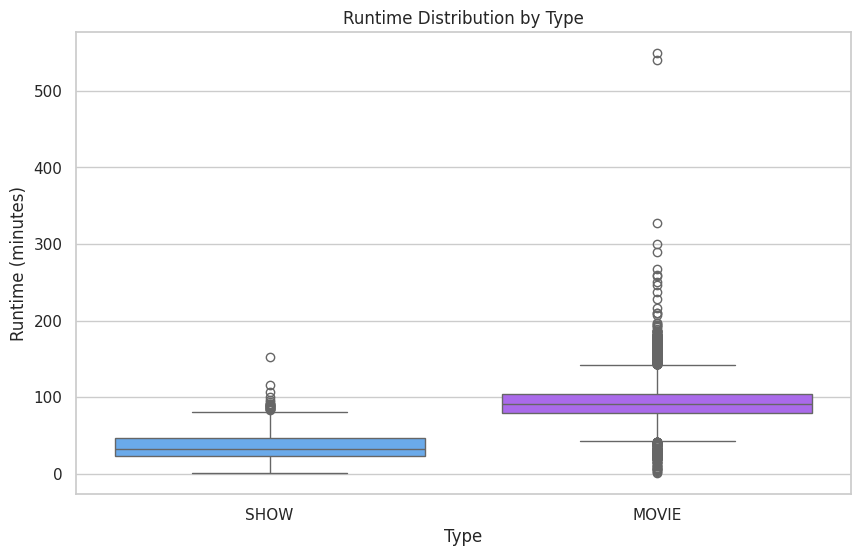

In [ ]:
# 15. Distribution of Content Lengths (Runtime)
# Convert 'runtime' to numeric
titles_df['runtime'] = pd.to_numeric(titles_df['runtime'], errors='coerce')

sns.boxplot(data=titles_df, x='type', y='runtime', palette='cool')
plt.title("Runtime Distribution by Type")
plt.xlabel("Type")
plt.ylabel("Runtime (minutes)")
plt.show()


In [ ]:
# 13. Summary of Insights
print("Insights Summary:")
print("- The most common genres on Amazon Prime include Drama, Comedy, and Documentary.")
print("- A spike in titles occurred post-2010, showing content growth.")
print("- IMDb ratings mostly lie between 5.5 and 7.5.")
print("- 'Movies' outnumber 'Shows' in type.")
print("- Top-rated content includes critically acclaimed titles with IMDb scores above 9.")

Insights Summary:
- The most common genres on Amazon Prime include Drama, Comedy, and Documentary.
- A spike in titles occurred post-2010, showing content growth.
- IMDb ratings mostly lie between 5.5 and 7.5.
- 'Movies' outnumber 'Shows' in type.
- Top-rated content includes critically acclaimed titles with IMDb scores above 9.


# **Business Objective:**
To gain deeper insights into content performance, user preferences, and improve content recommendation, acquisition, and retention strategies on OTT platforms like Netflix and Prime Video.

## **Suggested Solution to Achieve Business Objective:**
**Analyze Content Trends:**
Identify popular genres, languages, and formats using the titles.csv data to guide content acquisition.

**Evaluate Star Power:**
Use credits.csv to find top-performing actors/directors to invest in talent that drives viewership.

**Build Recommendation System:**
Use genre, cast, and metadata to suggest personalized content, increasing user engagement and retention.

**Identify Content Gaps:**
Spot underrepresented genres or languages to create diverse, in-demand content.

**Correlate Performance Factors:**
Study how duration, release year, and content type impact ratings to optimize future releases.



## **Conclusion:**
By leveraging data insights from titles and credits, the client can make smarter content, casting, and marketing decisions, boosting user engagement, satisfaction, and overall platform success.